# 0. Description

Описание атрибутов(ga_hits.csv):
- session_id — ID визита;
- client_id — ID посетителя;
- visit_date — дата визита;
- visit_time — время визита;
- visit_number — порядковый номер визита клиента;
- utm_source — канал привлечения;
- utm_medium — тип привлечения;
- utm_campaign — рекламная кампания;
- utm_keyword — ключевое слово;
- device_category — тип устройства;
- device_os — ОС устройства;
- device_brand — марка устройства;
- device_model — модель устройства;
- device_screen_resolution — разрешение экрана;
- device_brand — марка устройства;
- device_model — модель устройства;
- device_screen_resolution — разрешение экрана;
- device_browser — браузер;
- geo_country — страна;
- geo_city — город

Описание атрибутов(ga_sessions.csv):
- session_id — ID визита;
- hit_date — дата события;
- hit_time — время события;
- hit_number — порядковый номер события в рамках сессии;
- hit_type — тип события;
- hit_referer — источник события;
- hit_page_path — страница события;
- event_category — тип действия;
- event_action — действие;
- event_label — тег действия;
- event_value — значение результата действия
<hr>

**Целевые действия:**  
события типа ga_hits.event_action in
('sub_car_claim_click', 'sub_car_claim_submit_click',
'sub_open_dialog_click', 'sub_custom_question_submit_click',
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success',
'sub_car_request_submit_click')

**Реклама в социальных сетях:**  
все визиты с ga_sessions.utm_source in
('QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs',
IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw',
'gVRrcxiDQubJiljoTbGm').

**Органический трафик:**  
все визиты с ga_sessions.utm_medium in ('organic',
'referral', '(none)').

**Платный трафик:**  
весь неорганический трафик.

# 0. Targets

#### - Проведите проверку следующих гипотез:
1. Органический трафик не отличается от платного с точки зрения CR (Conversion Rate) в целевые события.
2. Трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR (Conversion Rate) в целевые события.
3. Трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события


#### - Ответьте на вопросы продуктовой команды:
4. Из каких источников (кампаний, устройств, локаций) к нам идёт самый целевой трафик (и с точки зрения объёма трафика, и с точки зрения CR)?
5. Какие авто пользуются наибольшим спросом? У каких авто самый лучший показатель CR (Conversion Rate) в целевые события?
6. Стоит ли нам увеличивать своё присутствие в соцсетях и давать там больше рекламы?

# 1.Data preparation

In [9]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set()

In [10]:
df_hits = pd.read_csv('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1aWTUBZoxDctNs-ldqEw-9dw0X2zR9upd')
# df_hits = pd.read_csv('../../ga_hits.csv')
df_hits.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [11]:
df_hits_usable = df_hits[['session_id', 'event_action', 'hit_page_path']]
df_hits_usable.head()

,session_id,event_action,hit_page_path
0,5639623078712724064.1640254056.1640254056,quiz_show,sberauto.com/cars?utm_source_initial=google&ut...
1,7750352294969115059.1640271109.1640271109,quiz_show,sberauto.com/cars/fiat?city=1&city=18&rental_c...
2,885342191847998240.1640235807.1640235807,quiz_show,sberauto.com/cars/all/volkswagen/polo/e994838f...
3,142526202120934167.1640211014.1640211014,quiz_show,sberauto.com/cars?utm_source_initial=yandex&ut...
4,3450086108837475701.1640265078.1640265078,quiz_show,sberauto.com/cars/all/mercedes-benz/cla-klasse...


In [12]:
df_hits_usable['target'] = df_hits_usable.event_action.isin(['sub_car_claim_click', 'sub_car_claim_submit_click',
'sub_open_dialog_click', 'sub_custom_question_submit_click',
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success',
'sub_car_request_submit_click'])


C:\Users\NA_PC\AppData\Local\Temp\ipykernel_4664\1655697762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hits_usable['target'] = df_hits_usable.event_action.isin(['sub_car_claim_click', 'sub_car_claim_submit_click',


In [13]:
df_hits_usable = pd.pivot_table(df_hits_usable,
               index=["session_id"],
               values=["target", "hit_page_path"],
               aggfunc={"target": sum, "hit_page_path": 'first'}
               ).reset_index()

C:\Users\NA_PC\AppData\Local\Temp\ipykernel_4664\4049975597.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_hits_usable = pd.pivot_table(df_hits_usable,


In [14]:
df_sessions = pd.read_csv('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1GaQnAgzshXMl0WwKHI11e2dBjMjoTlfU')
# df_sessions = pd.read_csv('../../ga_sessions.csv')
df_sessions.head()

C:\Users\NA_PC\AppData\Local\Temp\ipykernel_4664\414802871.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sessions = pd.read_csv('../../ga_sessions.csv')


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [15]:
df_sessions_usable = df_sessions.drop(columns=['client_id', 'visit_date', 'visit_time', 'visit_number', 'utm_adcontent', 'utm_keyword', 'device_screen_resolution'])
df_sessions_usable.head()

,session_id,utm_source,utm_medium,utm_campaign,device_category,device_os,device_brand,device_model,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Android,Huawei,NaN,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,mobile,Android,Samsung,NaN,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Android,Huawei,NaN,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,kjsLglQLzykiRbcDiGcD,cpc,NaN,mobile,NaN,Xiaomi,NaN,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,kjsLglQLzykiRbcDiGcD,cpc,NaN,mobile,NaN,Xiaomi,NaN,Chrome,Russia,Moscow


In [16]:
df_sessions_usable.shape

(1860042, 11)

In [17]:
df_hits_usable.shape

(1734610, 3)

In [18]:
print(df_sessions_usable.session_id.nunique())
print(df_hits_usable.session_id.nunique())

1860042
1734610


данные объединяет значения столбца session_id 
сделаем общую таблицу только в которую войдут только строки где session_id присутствует в обоих таблицах

In [19]:
df_united = pd.merge(df_hits_usable, df_sessions_usable)
df_united.head()

,session_id,hit_page_path,target,utm_source,utm_medium,utm_campaign,device_category,device_os,device_brand,device_model,device_browser,geo_country,geo_city
0,1000009318903347362.1632663668.1632663668,podpiska.sberauto.com/faq?utm_source_initial=y...,0,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,mobile,NaN,Samsung,NaN,Chrome,Russia,Gelendzhik
1,1000010177899156286.1635013443.1635013443,podpiska.sberauto.com/,0,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,mobile,Android,Samsung,NaN,Samsung Internet,Russia,Voronezh
2,1000013386240115915.1635402956.1635402956,sberauto.com/cars/all/lada-vaz/vesta/2fc745ed?...,0,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,mobile,Android,Samsung,NaN,Chrome,Russia,Cherkessk
3,1000017303238376207.1623489300.1623489300,podpiska.sberauto.com/,0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,NaN,Realme,NaN,Chrome,Russia,Irkutsk
4,1000020580299877109.1624943350.1624943350,sberauto.com/cars/https://sberauto.com/cars/b8...,0,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,mobile,NaN,Apple,NaN,Safari,Russia,Moscow


In [20]:
df_united.shape

(1732266, 13)

In [21]:
df_united.describe(include='all')

,session_id,hit_page_path,target,utm_source,utm_medium,utm_campaign,device_category,device_os,device_brand,device_model,device_browser,geo_country,geo_city
count,1732266,1732266,1.732266e+06,1732190,1732266,1536979,1732266,718302,1385070,15062,1732266,1732266,1732266
unique,1732266,209101,NaN,280,55,406,3,13,200,104,55,159,2389
top,1000009318903347362.1632663668.1632663668,podpiska.sberauto.com/,NaN,ZpYIoDJMcFzVoPFsHGJL,banner,LTuZkdKfxRGVceoWkVyg,mobile,Android,Apple,AuMdmADEIoPXiWpTsBEj,Chrome,Russia,Moscow
freq,1,924950,NaN,552555,525206,422992,1368679,425520,503533,9018,951573,1682423,750928
mean,NaN,NaN,5.936848e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,5.999437e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2.EDA
Разведочный анализ данных (Exploratory Data Analysis)

## 2.1 Data cleaning

In [99]:
df_united_clean = df_united.copy()
df_united_clean.shape

(1732266, 13)

In [100]:
df_united_clean.duplicated().value_counts()

False    1732266
Name: count, dtype: int64

#### Fullness of cells

In [101]:
def print_useful_rows_info(df):
    print('Amount of useful rows:', len(df.dropna()))
    print('Persentage of filled rows', round(len(df.dropna()) / len(df) * 100, 2))

In [102]:
print_useful_rows_info(df_united_clean)

Amount of useful rows: 14194
Persentage of filled rows 0.82


In [103]:
def blank_rows_percentage(df):
  print((df.isna().sum() / len(df) * 100).sort_values(ascending=False))

In [104]:
blank_rows_percentage(df_united_clean)

device_model       99.130503
device_os          58.533966
device_brand       20.042880
utm_campaign       11.273500
utm_source          0.004387
session_id          0.000000
hit_page_path       0.000000
target              0.000000
utm_medium          0.000000
device_category     0.000000
device_browser      0.000000
geo_country         0.000000
geo_city            0.000000
dtype: float64


удаляем все колонки где пропусков больше 20%:

In [105]:
df_united_clean = df_united_clean.drop(columns=['device_model', 'device_os', 'device_brand', 'session_id'], axis=1)

In [106]:
print_useful_rows_info(df_united_clean)

Amount of useful rows: 1536903
Persentage of filled rows 88.72


<Axes: >

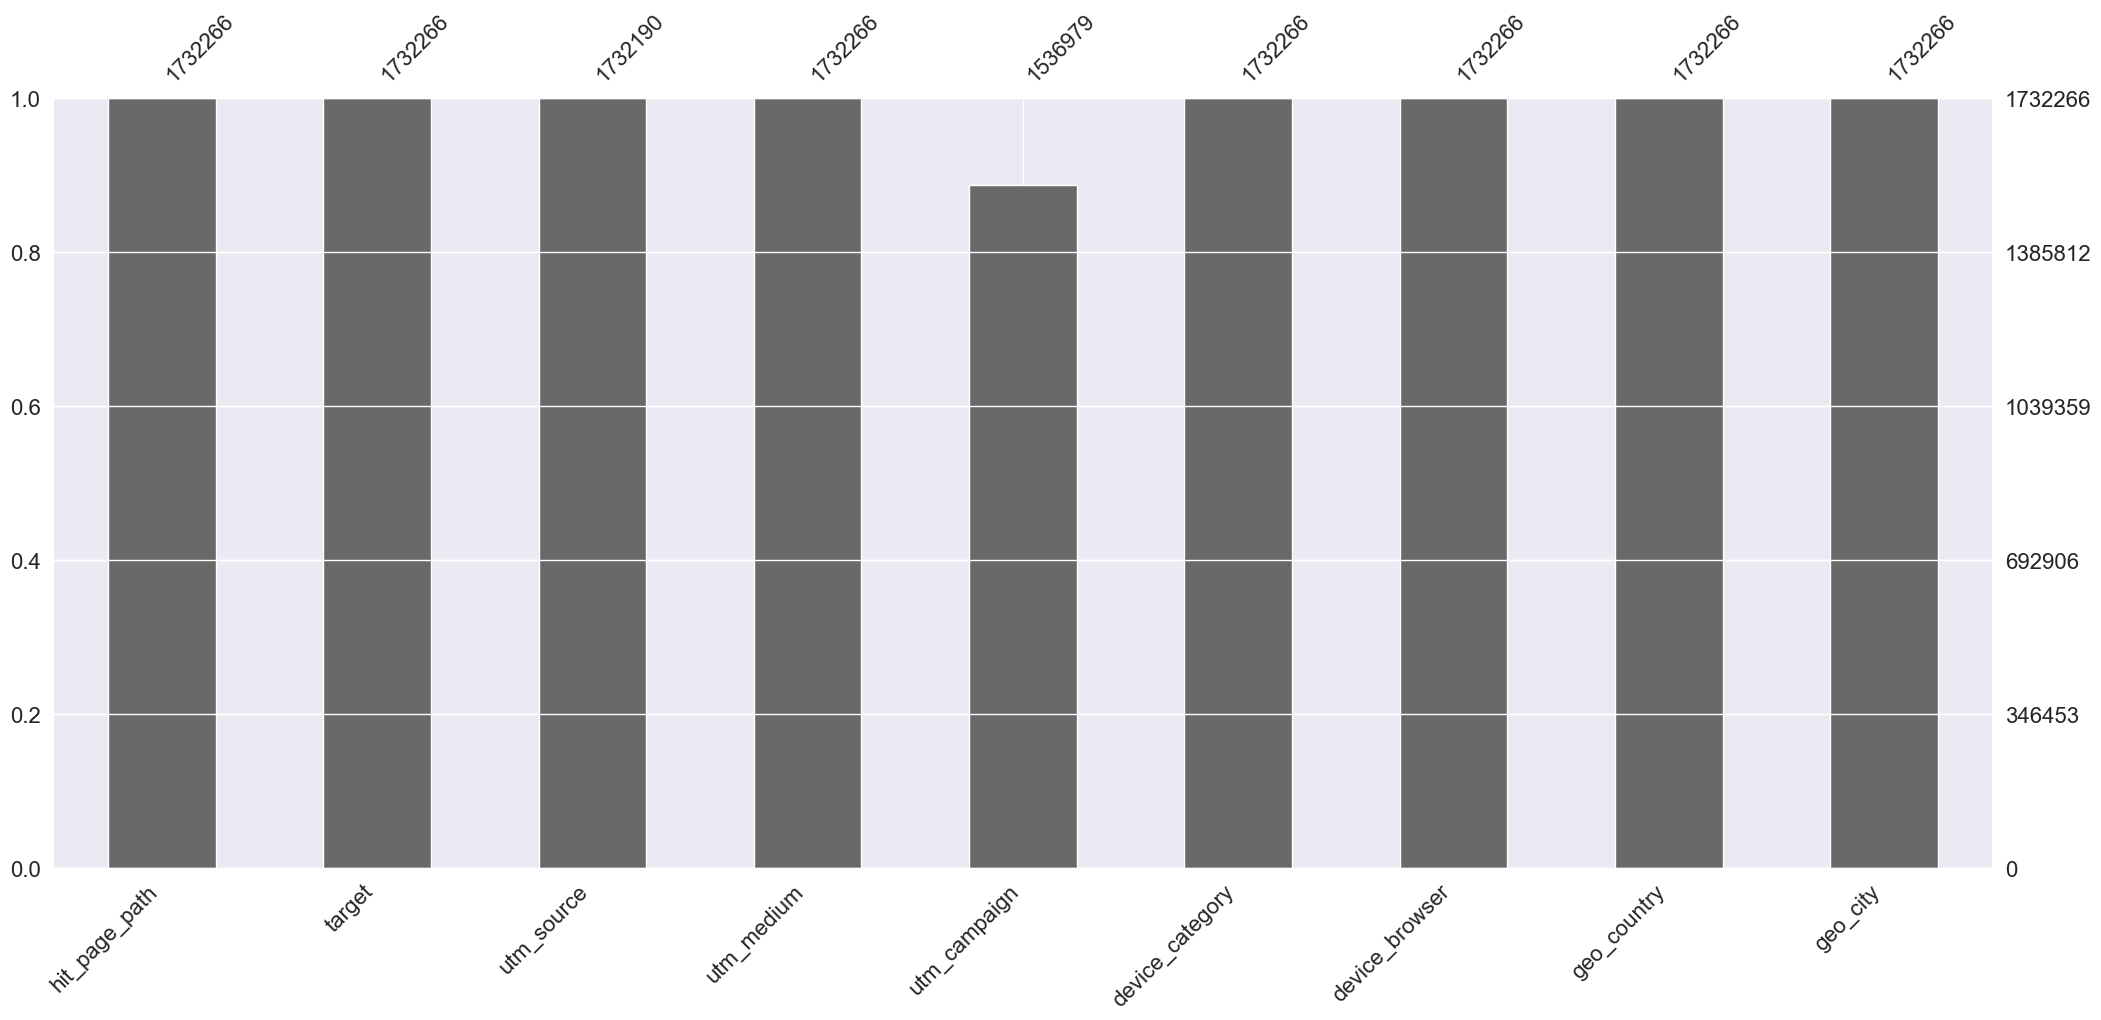

In [107]:
# диаграмма заполненности
msno.bar(df_united_clean)

### Заполнение пропусков

In [108]:
df_united_clean.utm_campaign.describe()

count                  1536979
unique                     406
top       LTuZkdKfxRGVceoWkVyg
freq                    422992
Name: utm_campaign, dtype: object

заполним как 'other'

In [109]:
df_united_clean.utm_campaign = df_united_clean.utm_campaign.fillna('other')

In [110]:
df_united_clean.utm_source.isna().sum()

76

Удалим строки с 'nan'

In [111]:
df_united_clean = df_united_clean[df_united_clean.utm_source.notna()]

In [112]:
print_useful_rows_info(df_united_clean)

Amount of useful rows: 1732190
Persentage of filled rows 100.0


Преобразование содержимого столбцов

In [113]:
df_united_clean.hit_page_path.values[10]
df_united_clean[df_united_clean.hit_page_path.str.contains('/cars/all/', regex=False)]
df_united_clean.hit_page_path.str.contains('/cars/all/', regex=False).value_counts()

hit_page_path
False    1511479
True      220711
Name: count, dtype: int64

In [114]:
df_united_clean['car_brand'] = df_united_clean.hit_page_path.apply(lambda x: x.split('/')[3] if '/cars/all/' in x else 'empty')
df_united_clean['car_model'] = df_united_clean.hit_page_path.apply(lambda x: x.split('/')[4] if '/cars/all/' in x else 'empty')
df_united_clean = df_united_clean.drop(columns=['hit_page_path'])

In [116]:
df_united_clean['from_smm'] = df_united_clean.utm_source.apply(lambda x: 1 if x in ['QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs',
'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw',
'gVRrcxiDQubJiljoTbGm'] else 0)
df_united_clean = df_united_clean.drop(columns=['utm_source'])

In [117]:
df_united_clean['is_organic'] = df_united_clean.utm_medium.apply(lambda x: 1 if x in ['organic',
'referral', '(none)'] else 0)
df_united_clean = df_united_clean.drop(columns=['utm_medium'])

Автоподписка работает только по РФ поэтому удаляем все остальные страны из датасета

In [118]:
df_united_clean = df_united_clean[df_united_clean.geo_country == 'Russia']
df_united_clean = df_united_clean.drop(columns = ['geo_country'], axis=1)

In [119]:
df_united_clean = df_united_clean.rename(columns={'geo_city': 'city'})

In [120]:
df_united_clean['target'] = df_united_clean.target.apply(lambda x: 1 if x > 0 else 0)

In [121]:
df_united_clean.device_category = df_united_clean.device_category.astype('category')
df_united_clean.device_browser = df_united_clean.device_browser.astype('category')
df_united_clean.utm_campaign = df_united_clean.utm_campaign.astype('category')
df_united_clean.city = df_united_clean.city.astype('category')
df_united_clean.car_brand = df_united_clean.car_brand.astype('category')
df_united_clean.car_model = df_united_clean.car_model.astype('category')

### Определение типов переменных в датасете df_united

|  Переменная               | Дискретная | Непрерывная | Качественная |
|---------------------------|------------|-------------|--------------|
| from_smm                  |            |             | X            |
| is_organic                |            |             | X            |
| device_category           |            |             | X            |
| device_browser            |            |             | X            |
| city                      |            |             | X            |
| car_brand                 |            |             | X            |
| car_model                 |            |             | X            |
| target(целевая)           |            |             | X            |

In [122]:
df_united_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1682347 entries, 0 to 1732265
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype   
---  ------           --------------    -----   
 0   target           1682347 non-null  int64   
 1   utm_campaign     1682347 non-null  category
 2   device_category  1682347 non-null  category
 3   device_browser   1682347 non-null  category
 4   city             1682347 non-null  category
 5   car_brand        1682347 non-null  category
 6   car_model        1682347 non-null  category
 7   from_smm         1682347 non-null  int64   
 8   is_organic       1682347 non-null  int64   
dtypes: category(6), int64(3)
memory usage: 64.2 MB


Exploring

In [123]:
df_united_clean.car_brand.nunique()

21

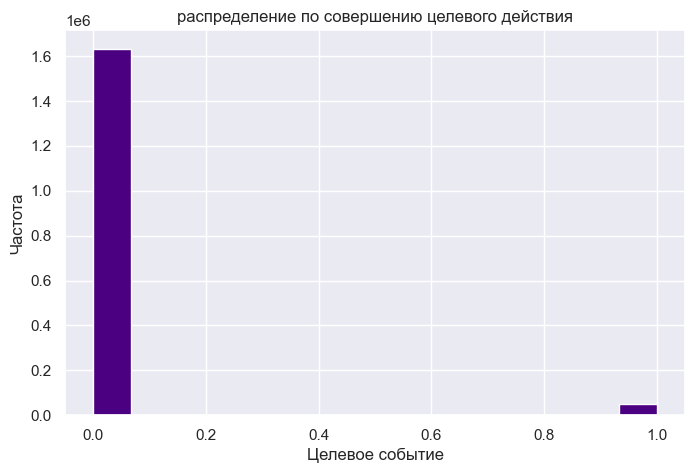

In [124]:
plt.figure(figsize=(8, 5))
plt.hist(df_united_clean.target, bins=15, color='indigo')
plt.xlabel('Целевое событие')
plt.ylabel('Частота')
plt.title('распределение по совершению целевого действия');

### Визуализация категориальных переменных

In [125]:
df_car_brand_amount = df_united_clean[df_united_clean.car_brand != 'empty'].groupby(['car_brand'], as_index=False).target.count().rename(columns={'target': 'amount'})
df_car_brand_amount

C:\Users\NA_PC\AppData\Local\Temp\ipykernel_4664\1899445986.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_car_brand_amount = df_united_clean[df_united_clean.car_brand != 'empty'].groupby(['car_brand'], as_index=False).target.count().rename(columns={'target': 'amount'})


,car_brand,amount
0,audi,3327
1,bmw,10972
2,empty,0
3,haval,2788
4,honda,5
5,hyundai,1126
6,infiniti,4
7,kia,12797
8,lada-vaz,26563
9,land-rover,1370


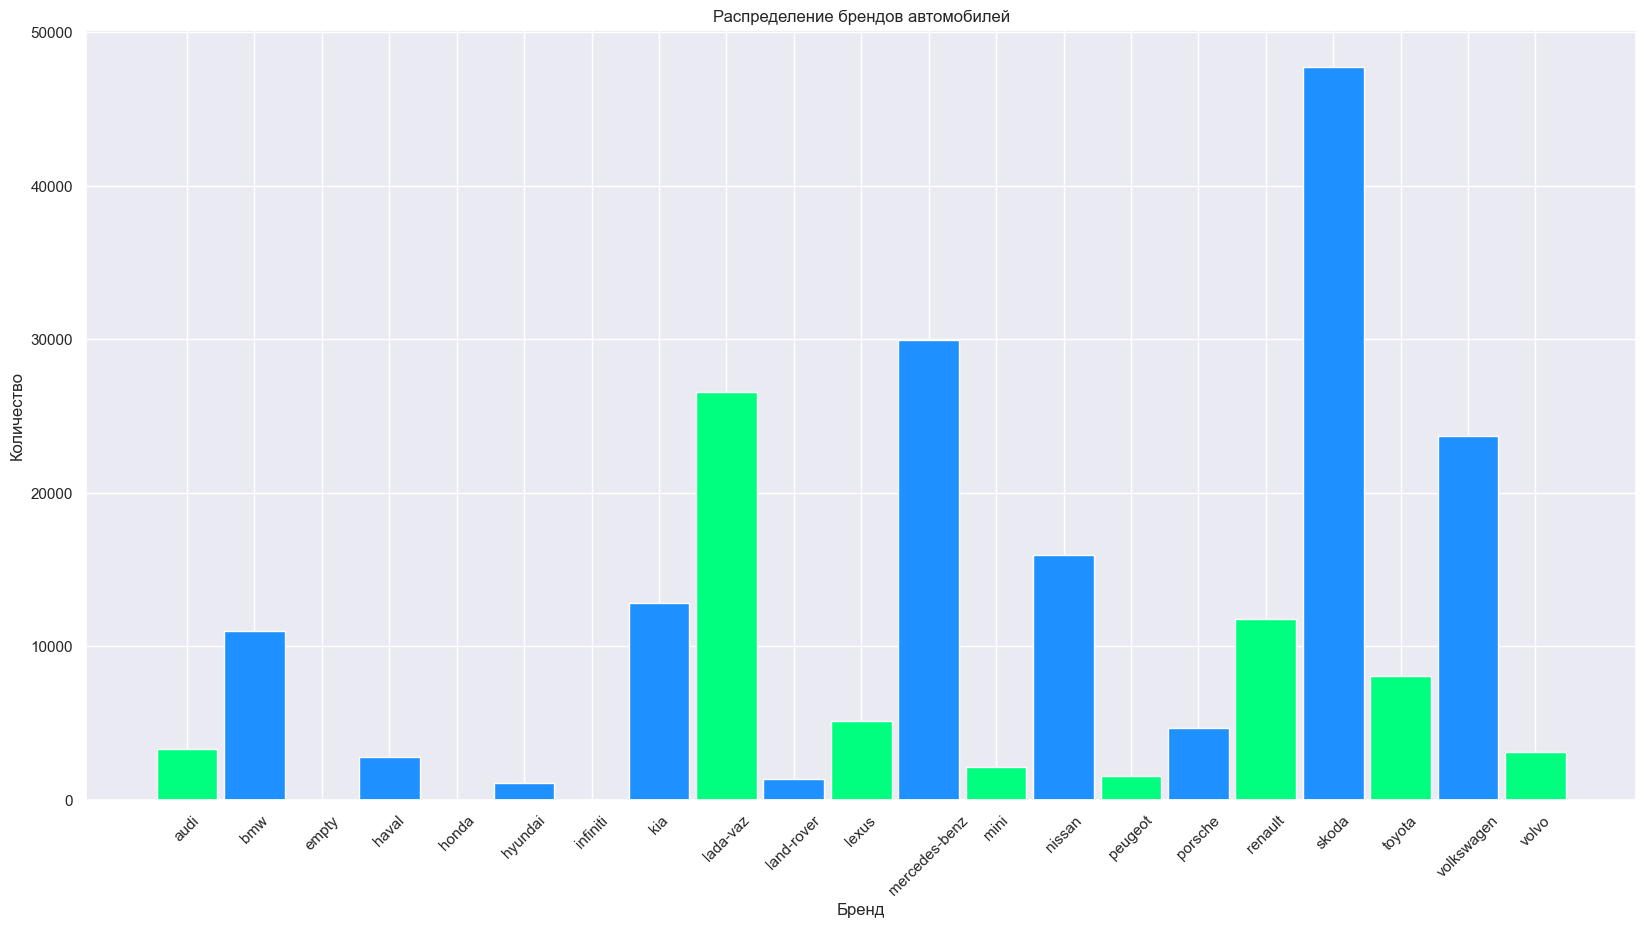

In [126]:
plt.figure(figsize=(20, 10))
plt.bar(df_car_brand_amount.car_brand, df_car_brand_amount.amount, color=['springgreen', 'dodgerblue'], width=0.9)
plt.xticks(rotation=45)
plt.xlabel('Бренд')
plt.ylabel('Количество')
plt.title('Распределение брендов автомобилей');

In [127]:
df_city_amount = df_united_clean[df_united_clean.city != '(not set)'].groupby(['city'], as_index=False).target.count().rename(columns={'target': 'amount'}).sort_values(by='amount', ascending=False)
df_city_amount.describe()

C:\Users\NA_PC\AppData\Local\Temp\ipykernel_4664\3138253756.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_city_amount = df_united_clean[df_united_clean.city != '(not set)'].groupby(['city'], as_index=False).target.count().rename(columns={'target': 'amount'}).sort_values(by='amount', ascending=False)


,amount
count,505.000000
mean,3201.172277
std,35724.043999
min,0.000000
25%,21.000000
50%,113.000000
75%,713.000000
max,750873.000000


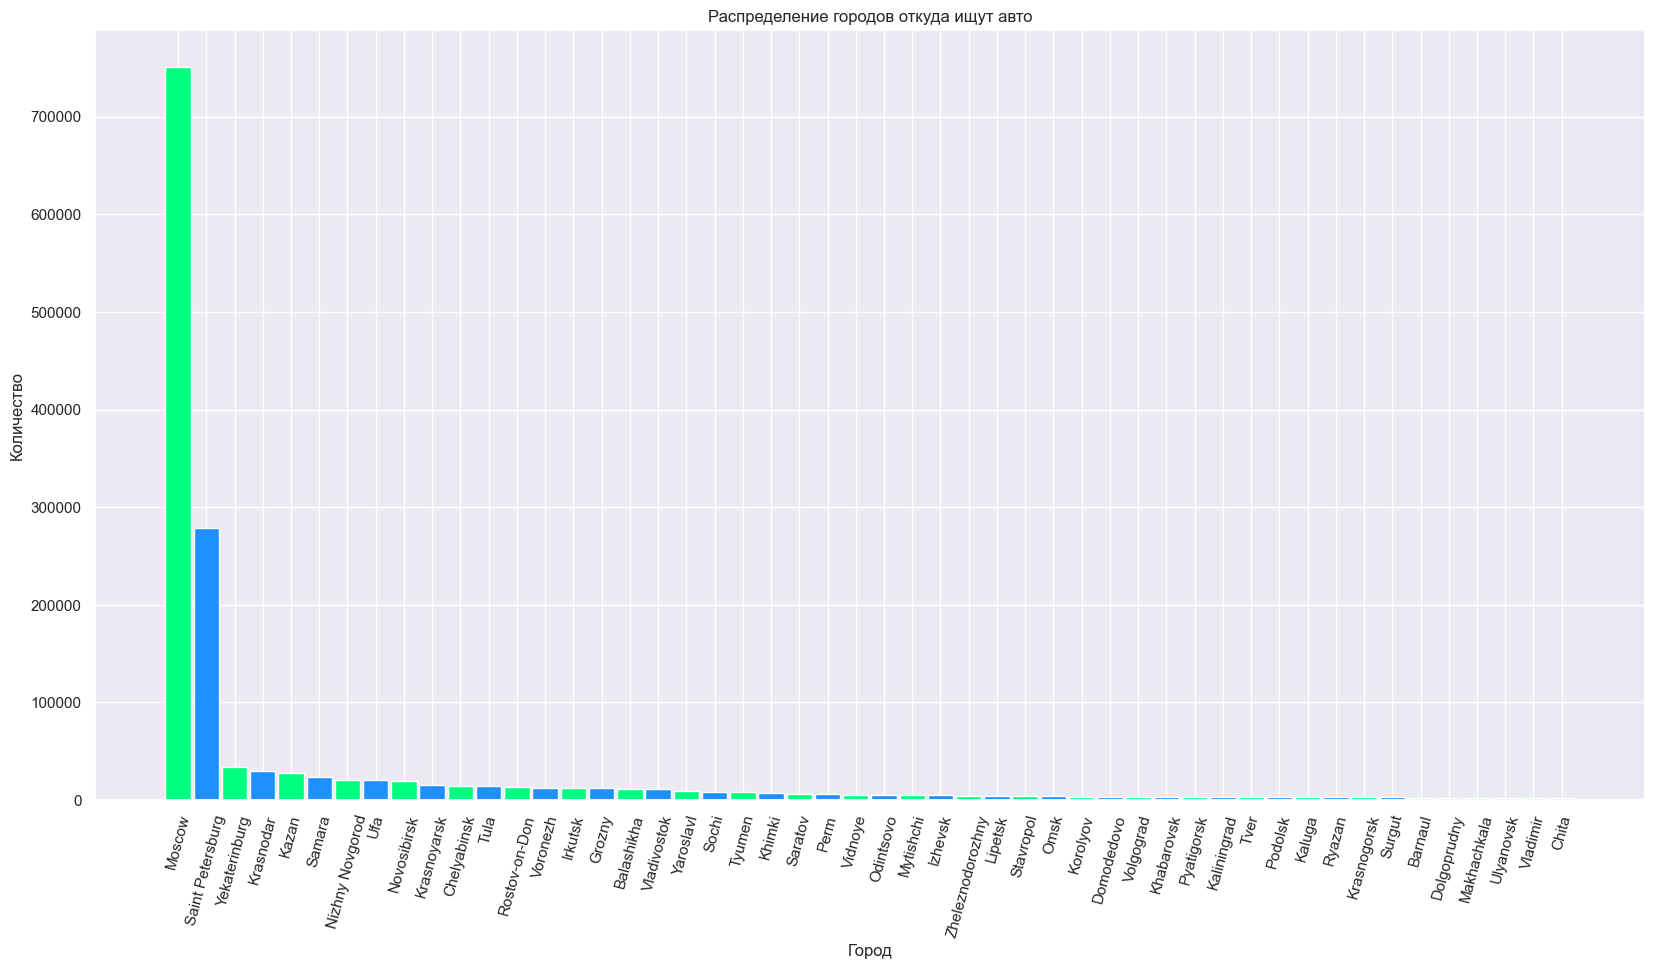

In [130]:

plt.figure(figsize=(20, 10))
plt.bar(df_city_amount.city.head(50), df_city_amount.amount.head(50), color=['springgreen', 'dodgerblue'], width=0.9)
plt.xticks(rotation=75)
plt.xlabel('Город')
plt.ylabel('Количество')
plt.title('Распределение городов откуда ищут авто');

In [131]:
df_united_clean.device_browser.unique()

['Chrome', 'Samsung Internet', 'Safari', 'YaBrowser', 'Edge', ..., 'com.zhiliaoapp.musically', 'Konqueror', 'Iron', 'Threads 202.0.0.23.119', '(not set)']
Length: 30
Categories (30, object): ['(not set)', 'Amazon Silk', 'Android Browser', 'Android Webview', ..., '[FBAN', 'com.vk.vkclient', 'com.zhiliaoapp.musically', 'helloworld']

In [132]:
df_device_browser_amount = df_united_clean[df_united_clean.device_browser != '(not set)'].groupby(['device_browser'], as_index=False).target.count().rename(columns={'target': 'amount'}).sort_values(by='amount', ascending=False)


C:\Users\NA_PC\AppData\Local\Temp\ipykernel_4664\489444557.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_device_browser_amount = df_united_clean[df_united_clean.device_browser != '(not set)'].groupby(['device_browser'], as_index=False).target.count().rename(columns={'target': 'amount'}).sort_values(by='amount', ascending=False)


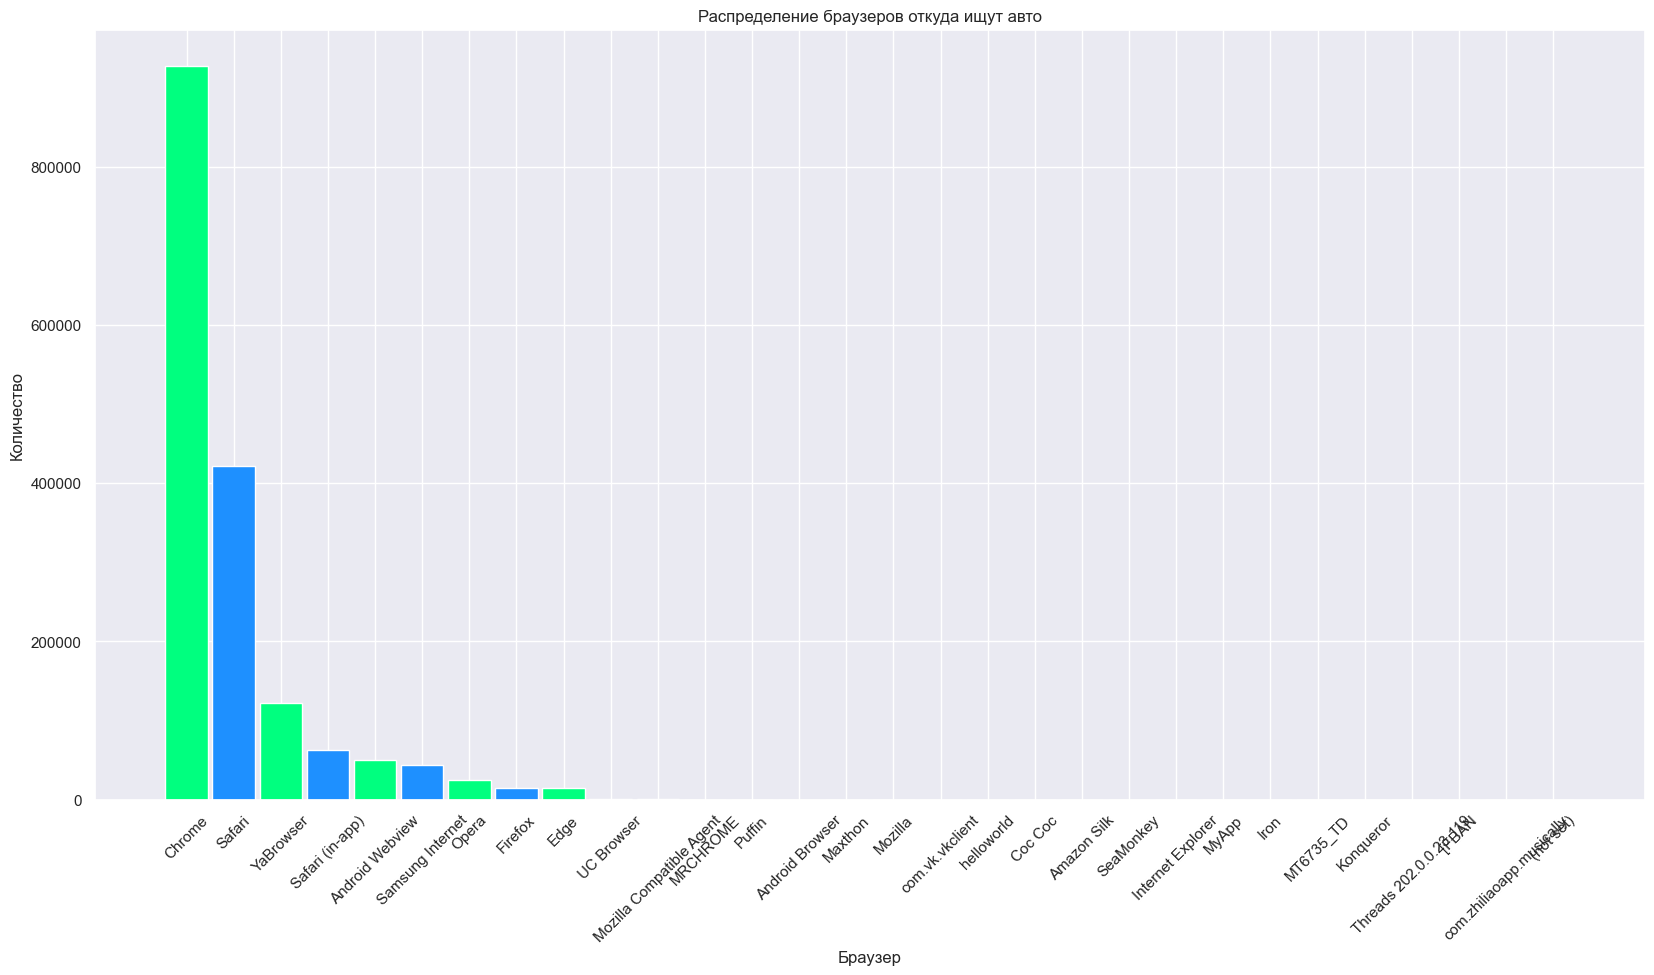

In [133]:
plt.figure(figsize=(20, 10))
plt.bar(df_device_browser_amount.device_browser, df_device_browser_amount.amount, color=['springgreen', 'dodgerblue'], width=0.9)
plt.xticks(rotation=45)
plt.xlabel('Браузер')
plt.ylabel('Количество')
plt.title('Распределение браузеров откуда ищут авто');

In [134]:

df_united_clean.device_category.unique()

['mobile', 'desktop', 'tablet']
Categories (3, object): ['desktop', 'mobile', 'tablet']

In [135]:
df_device_category_amount = df_united_clean.groupby(['device_category'], as_index=False).target.count() \
                .rename(columns={'target': 'amount'})
df_device_category_amount

C:\Users\NA_PC\AppData\Local\Temp\ipykernel_4664\3194697068.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_device_category_amount = df_united_clean.groupby(['device_category'], as_index=False).target.count() \


,device_category,amount
0,desktop,332991
1,mobile,1333547
2,tablet,15809


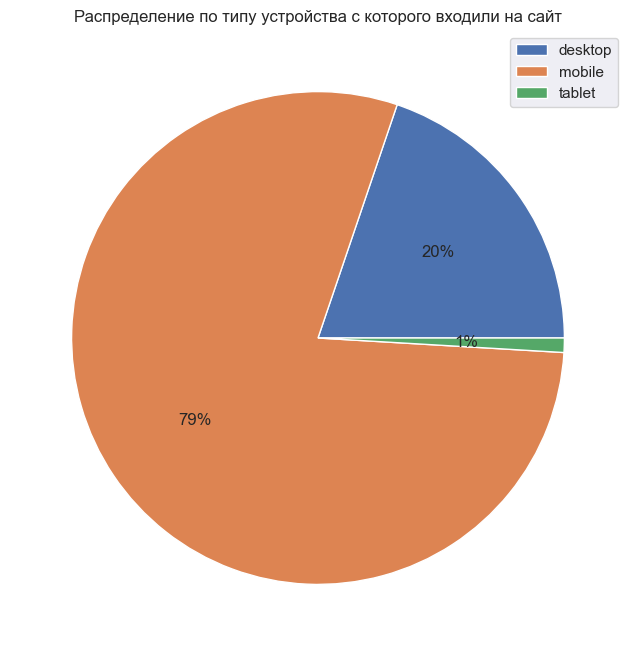

In [137]:
plt.figure(figsize=(12, 8))
plt.pie(df_device_category_amount.amount, labels=df_device_category_amount.device_category, labeldistance=None, autopct = '%1.0f%%')
plt.title("Распределение по типу устройства с которого входили на сайт")
plt.legend()
plt.show();

# 3.Modeling
Моделирование и проверка статистическиз гипотез

### 1. Органический трафик не отличается от платного с точки зрения CR (Conversion Rate) в целевые события.

In [139]:
def calculate_cr(df):
    return df.target.sum() / len(df)

In [140]:
cr_general = calculate_cr(df_united_clean) 
cr_general

0.029215732545069477

In [141]:
cr_organic = calculate_cr(df_united_clean[df_united_clean.is_organic == 1])
cr_organic

0.044897331693492325

In [142]:
cr_paid = calculate_cr(df_united_clean[df_united_clean.is_organic == 0])
cr_paid

0.023509898072431566

In [143]:
stats.binom_test(x= df_united_clean[df_united_clean.is_organic == 1].target.sum(), \
                n= len(df_united_clean[df_united_clean.is_organic == 1]), \
                p =cr_paid, alternative='greater')

C:\Users\NA_PC\AppData\Local\Temp\ipykernel_4664\2006229913.py:1: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  stats.binom_test(x= df_united_clean[df_united_clean.is_organic == 1].target.sum(), \


0.0

#### Вывод: *органический трафик стистически значимо **отличается от платного и его CR выше платного***

### 2. Трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR (Conversion Rate) в целевые события.

In [144]:
cr_mobile = calculate_cr(df_united_clean[df_united_clean.device_category == 'mobile'])
cr_mobile

0.028214978549687412

In [145]:
cr_desktop = calculate_cr(df_united_clean[df_united_clean.device_category == 'desktop'])
cr_desktop

0.03338528668943005

In [146]:
all_mobile = df_united_clean[df_united_clean.device_category == 'mobile'].target.sum()

In [147]:
success_mobile = len(df_united_clean[df_united_clean.device_category == 'mobile'])

In [148]:
stats.binom_test(x= all_mobile, \
                n= success_mobile, \
                p =cr_desktop)

C:\Users\NA_PC\AppData\Local\Temp\ipykernel_4664\2195941481.py:1: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  stats.binom_test(x= all_mobile, \


3.5924903571934647e-255

#### Вывод: *Трафик с мобильных устройств статистически значимо **отличается от трафика с десктопных устройств.***

### 3. Трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события

In [149]:
df_united_clean.city.nunique()

505

In [150]:
df_united_clean.city.unique()

['Gelendzhik', 'Voronezh', 'Cherkessk', 'Irkutsk', 'Moscow', ..., '13403', 'Bavly', 'Kresttsy', 'Beslan', 'Aleksandrovsk-Sakhalinskiy']
Length: 505
Categories (505, object): ['(not set)', '13403', '14076', '24130', ..., 'Zvenigorod', 'Тарасовка', 'Тимофеевка', 'Хомутово']

In [154]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="tutorial")
# location = geolocator.geocode("175 5th Avenue NYC")
# print((geolocator.geocode("175 5th Avenue NYC").latitude, geolocator.geocode("175 5th Avenue NYC").longitude))

In [155]:
df_united_clean['region'] = df_united_clean.city.apply(lambda x: geolocator.geocode(x + ', Russia'))

GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=%28not+set%29%2C+Russia&format=json&limit=1 (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)')))

In [ ]:
df_united_clean = df_united_clean[df_united_clean.region.notna()]

In [ ]:
df_united_clean['city_name'] = df_united_clean.region.apply(lambda x: x.address.split(', ')[0])
df_united_clean.city_name

/var/folders/zz/zyxvpxvq6csfxvn_n003whnr00z45f/T/ipykernel_8918/896059053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_united_clean['city_name'] = df_united_clean.region.apply(lambda x: x.address.split(', ')[0])


0                           Геленджик
1             городской округ Воронеж
2          Черкесский городской округ
3                   Иркутская область
4                              Москва
                      ...            
1732261                        Москва
1732262               Санкт-Петербург
1732263               Нижний Новгород
1732264                     Челябинск
1732265               Железнодорожный
Name: city_name, Length: 1613909, dtype: object

In [ ]:
df_united_clean['territory'] = df_united_clean.region.apply(lambda x: x.address.split(', ')[1])
df_united_clean.territory

/var/folders/zz/zyxvpxvq6csfxvn_n003whnr00z45f/T/ipykernel_8918/164124031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_united_clean['territory'] = df_united_clean.region.apply(lambda x: x.address.split(', ')[1])


0                  городской округ Геленджик
1                        Воронежская область
2                         Карачаево-Черкесия
3                Сибирский федеральный округ
4              Центральный федеральный округ
                         ...                
1732261        Центральный федеральный округ
1732262    Северо-Западный федеральный округ
1732263      городской округ Нижний Новгород
1732264                      Советский район
1732265      Правдинский муниципальный округ
Name: territory, Length: 1613909, dtype: object

In [ ]:
df_united_clean[df_united_clean.city_name.isin(['Москва', 'Санкт-Петербург']) \
                | df_united_clean.territory.isin(['Московская область'])] \
                .target.value_counts()

target
0    1004987
1      30964
Name: count, dtype: int64

In [ ]:
df_united_clean[~df_united_clean.city_name.isin(['Москва', 'Санкт-Петербург']) \
                & ~df_united_clean.territory.isin(['Московская область'])] \
                .target.value_counts()

target
0    561209
1     16749
Name: count, dtype: int64

In [ ]:
success_metropolitan = df_united_clean[df_united_clean.city_name.isin(['Москва', 'Санкт-Петербург']) \
                | df_united_clean.territory.isin(['Московская область'])].target.sum()
success_metropolitan

30964

In [ ]:
all_metropolitan = len(df_united_clean[df_united_clean.city_name.isin(['Москва', 'Санкт-Петербург']) \
                | df_united_clean.territory.isin(['Московская область'])])
all_metropolitan

1035951

In [ ]:
cr_province = calculate_cr(df_united_clean[~df_united_clean.city_name.isin(['Москва', 'Санкт-Петербург']) \
                & ~df_united_clean.territory.isin(['Московская область'])])
cr_province

0.028979614435651033

In [ ]:
stats.binom_test(x= success_metropolitan, \
                n= all_metropolitan, \
                p =cr_province)

/var/folders/zz/zyxvpxvq6csfxvn_n003whnr00z45f/T/ipykernel_8918/2268514679.py:1: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  stats.binom_test(x= success_metropolitan, \


3.9317342183180944e-08

#### Вывод: *Трафик из городов присутствия (Москва и область, Санкт-Петербург) статистически значимо **отличается от трафика из иных регионов.***

### 4. Из каких источников (кампаний, устройств, локаций) к нам идёт самый целевой трафик (и с точки зрения объёма трафика, и с точки зрения CR)?

In [156]:
df_united_clean

,target,utm_campaign,device_category,device_browser,city,car_brand,car_model,from_smm,is_organic
0,0,FTjNLDyTrXaWYgZymFkV,mobile,Chrome,Gelendzhik,empty,empty,1,0
1,0,LTuZkdKfxRGVceoWkVyg,mobile,Samsung Internet,Voronezh,empty,empty,0,1
2,0,gecBYcKZCPMcVYdSSzKP,mobile,Chrome,Cherkessk,lada-vaz,vesta,0,0
3,0,LEoPHuyFvzoNfnzGgfcd,mobile,Chrome,Irkutsk,empty,empty,0,0
4,0,LTuZkdKfxRGVceoWkVyg,mobile,Safari,Moscow,empty,empty,0,1
...,...,...,...,...,...,...,...,...,...
1732261,0,FTjNLDyTrXaWYgZymFkV,mobile,Chrome,Moscow,empty,empty,1,0
1732262,0,LEoPHuyFvzoNfnzGgfcd,mobile,Safari,Saint Petersburg,empty,empty,0,0
1732263,0,LEoPHuyFvzoNfnzGgfcd,mobile,Chrome,Nizhny Novgorod,empty,empty,0,0
1732264,0,LEoPHuyFvzoNfnzGgfcd,mobile,Samsung Internet,Chelyabinsk,empty,empty,0,0


In [157]:
df_united_clean.groupby(['device_category'], as_index=False) \
                        .agg({'target': 'sum'}) \
                        .sort_values('target', ascending=False) \
                        .rename(columns={'target': 'success_amount'}).head(3)

C:\Users\NA_PC\AppData\Local\Temp\ipykernel_4664\1814804642.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_united_clean.groupby(['device_category'], as_index=False) \


,device_category,success_amount
1,mobile,37626
0,desktop,11117
2,tablet,408


In [159]:
df_united_clean.groupby(['city'], as_index=False) \
                        .agg({'target': 'sum'}) \
                        .sort_values('target', ascending=False) \
                        .rename(columns={'target': 'success_amount'}).head(3)

C:\Users\NA_PC\AppData\Local\Temp\ipykernel_4664\3138819425.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_united_clean.groupby(['city'], as_index=False) \


,city,success_amount
247,Moscow,23625
350,Saint Petersburg,7113
0,(not set),1361


In [160]:
df_united_clean.groupby(['utm_campaign'], as_index=False) \
                        .agg({'target': 'sum'}) \
                        .sort_values('target', ascending=False) \
                        .rename(columns={'target': 'success_amount'}).head(3)

C:\Users\NA_PC\AppData\Local\Temp\ipykernel_4664\3355603661.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_united_clean.groupby(['utm_campaign'], as_index=False) \


,utm_campaign,success_amount
80,LTuZkdKfxRGVceoWkVyg,18380
77,LEoPHuyFvzoNfnzGgfcd,9182
299,other,7068


С точки зрения объема больше всего трафика идет из:

- устройство: "мобильный телефон"
- город: "Москва"
- рекламная компания: "LTuZkdKfxRGVceoWkVyg"

In [172]:
df_united_clean.groupby(['device_category'], as_index=False) \
                        .agg({'target': 'mean'}) \
                        .sort_values('target', ascending=False) \
                        .rename(columns={'target': 'CR'}).head(3)

C:\Users\NA_PC\AppData\Local\Temp\ipykernel_4664\1656467698.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_united_clean.groupby(['device_category'], as_index=False) \


,device_category,CR
0,desktop,0.033385
1,mobile,0.028215
2,tablet,0.025808


In [173]:
df_united_clean.groupby(['city'], as_index=False) \
                        .agg({'target': 'mean'}) \
                        .sort_values('target', ascending=False) \
                        .rename(columns={'target': 'CR'}).head(3)

C:\Users\NA_PC\AppData\Local\Temp\ipykernel_4664\1193189130.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_united_clean.groupby(['city'], as_index=False) \


,city,CR
104,Enem,0.222222
234,Marks,0.200000
407,Tarko-Sale,0.166667


In [174]:
df_united_clean.groupby(['utm_campaign'], as_index=False) \
                        .agg({'target': 'mean'}) \
                        .sort_values('target', ascending=False) \
                        .rename(columns={'target': 'CR'}).head(3)

C:\Users\NA_PC\AppData\Local\Temp\ipykernel_4664\3449241654.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_united_clean.groupby(['utm_campaign'], as_index=False) \


,utm_campaign,CR
63,JkhCpeDGCtTwhwqWLywv,1.000
88,MHdHrBKQwbDaRalwnlJq,1.000
52,IRKNegNgOUQLwudzMElF,0.875


С точки зрения CR больше всего трафика идет из:

- устройство: "персональный компьютер"
- город: "Энем"
- рекламная компания: "MHdHrBKQwbDaRalwnlJq" и "IRKNegNgOUQLwudzMElF"

### 5. Какие авто пользуются наибольшим спросом? У каких авто самый лучший показатель CR (Conversion Rate) в целевые события?

In [175]:
df_united_clean.car_model.nunique()

71

In [176]:
df_united_clean.car_model.unique()

['empty', 'vesta', 'polo', 'rapid', 'e-klasse', ..., 'k5', 'macan', 'qx60', 'passat', 'v-klasse']
Length: 71
Categories (71, object): ['2-serii', '3-serii', '5-serii', '7-serii', ..., 'x3-m', 'x5', 'x6', 'x7']

In [177]:
df_united_clean.groupby(['car_model'], as_index=False) \
                        .agg({'target': 'sum'}) \
                        .sort_values('target', ascending=False) \
                        .rename(columns={'target': 'success_amount'}).head(4)

C:\Users\NA_PC\AppData\Local\Temp\ipykernel_4664\4097712617.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_united_clean.groupby(['car_model'], as_index=False) \


,car_model,success_amount
20,empty,38731
46,rapid,1893
63,vesta,1603
40,polo,1415


#### Наибольшим спросом пользуется rapid, vesta, polo.

In [181]:
df_united_clean.groupby(['car_model'], as_index=False) \
                        .agg({'target': 'mean'}) \
                        .sort_values('target', ascending=False) \
                        .rename(columns={'target': 'CR'}).head(3)

C:\Users\NA_PC\AppData\Local\Temp\ipykernel_4664\1805944549.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_united_clean.groupby(['car_model'], as_index=False) \


,car_model,CR
67,x3-m,0.333333
8,arkana,0.292683
12,cerato,0.168421


#### Наибольший CR у x3-m, arkana, cerato.

### 6. Стоит ли нам увеличивать своё присутствие в соцсетях и давать там больше рекламы?

In [187]:
df_united_clean.groupby(['from_smm'], as_index=False) \
                        .agg({'target': 'mean'}) \
                        .sort_values('target', ascending=False) \
                        .rename(columns={'target': 'CR'})

,from_smm,CR
0,0,0.031480
1,1,0.016026


In [189]:
df_united_clean.groupby(['from_smm'], as_index=False) \
                        .agg({'target': 'count'}) \
                        .sort_values('target', ascending=False) \
                        .rename(columns={'target': 'amount'})

,from_smm,amount
0,0,1435817
1,1,246530


### Конверсия от СММ=1.6% что является нормальным показателем, соответсвенно при увеличении объема трафика будет получено больше клиентов